In [1]:
import numpy as np

# 신경망 학습
**학습**이란?
- 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

손실 함수?
- 신경망이 학습할 수 있도록 해주는 **지표**
- 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표


## 4.2.1 오차제곱합(sum of squares for error, SSE)
$$ E = \frac{1}{2}\sum_{k} (y_{k} - t_{k})^2 $$

- $ y_{k}$ : 신경망의 출력 (신경망이 추정한 값)
- $ t_{k}$ : 정답 레이블
- k : 데이터의 차원 수

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

## 4.2.2 교차 엔트로치 오차(cross entropy error, CEE)

$$ E = -\sum_{k} t_{k} \log y_{k}$$

- $ y_{k}$ : 신경망의 출력 (신경망이 추정한 값)
- $ t_{k}$ : 정답 레이블
    - 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (one-hot encoding)
    - 실질적으로 정답일 때의 추정($t_{k}$가 1일 때의 $y_{k}$)의 자연로그를 계산하는 식
- k : 데이터의 차원 수

#### 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

np.log를 계산할 떄 아주 작은 값인 delta를 더했다. 이는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문이다. 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이다.

In [6]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3 미니배치(mini-batch) 학습

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from deep_learning_github.dataset.mnist import load_mnist

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


#### mini-batch를 위한 학습 데이터 무작위 선택

In [17]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [18]:
np.random.choice(60000, 10) # 이렇게 무작위로 뽑은 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용

array([15720, 57422, 29577, 26910,  3523, 31216, 34212, 43019, 22796,
       47342])

## (배치용) 교차 엔트로피 오차 구현하기

데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 변경

In [26]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        print(t, y)
        print(t.shape, y.shape)
    batch_size = y.shape[0]
    print(batch_size)
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [32]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

[[0 0 1 0 0 0 0 0 0 0]] [[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
(1, 10) (1, 10)
1


0.510825457099338

In [59]:
def cross_entropy_error(y, t):
    print(t.shape)
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    print(t)
    print(y)
    print(np.arange(batch_size))
    print(batch_size)
    print(np.log(y[np.arange(batch_size), t]))
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [60]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

(10,)
[[0 0 1 0 0 0 0 0 0 0]]
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
[0]
1
[[-2.30258509 -2.30258509 -2.99573227 -2.30258509 -2.30258509 -2.30258509
  -2.30258509 -2.30258509 -2.30258509 -2.30258509]]


23.718987110506905

## 4.3.1 미분


$$ \frac{df(x)}{dx} = \lim_{h->0} \frac{f(x+h) - f(x)}{h} $$

In [61]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [62]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.2 수치 미분의 예

In [76]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

In [85]:
import numpy as np
import matplotlib.pylab as plt

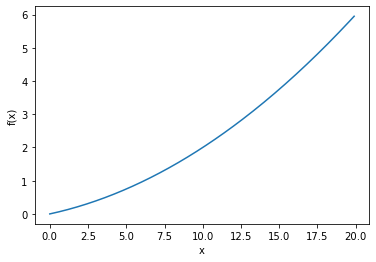

In [86]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다 
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [87]:
numerical_diff(function_1, 5)

0.1999999999990898

In [88]:
numerical_diff(function_1, 10)

0.2999999999986347

In [89]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t : d*t + y

0.1999999999990898


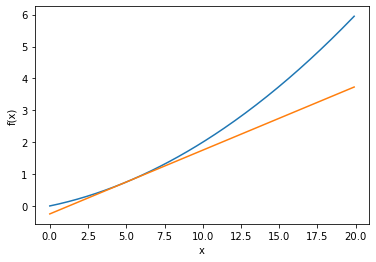

In [90]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


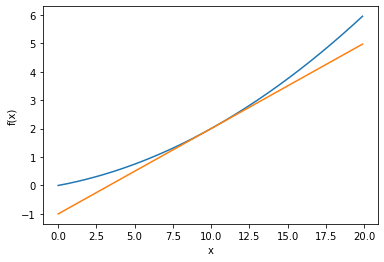

In [91]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 편미분

$$ f(x_{0}, x_{1}) = x_{0}^2 + x_{1}^2$$

In [93]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [ ]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

$x_{0}$ = 3, $x_{1}$ = 4일 때, $x_{0}$에 대한 편미분 $\frac{∂f}{∂x_{0}}$

In [94]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [95]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기(gradient)

In [97]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [98]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [99]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [100]:
numerical_gradient(function_2, np.array([2.0, 0.0]))

array([4., 0.])